In [2]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [3]:
# Import the saved CSV
df = pd.read_csv('stock_aggregates.csv')

In [4]:
# Convert timestamp to New York time
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms', utc=True)
df['timestamp'] = df['timestamp'].dt.tz_convert('America/New_York')

In [5]:
# Retrieve minimum and maximum timestamps
print("Min timestamp", df['timestamp'].min())
print("Max timestamp", df['timestamp'].max())

Min timestamp 2025-06-10 10:14:00-04:00
Max timestamp 2025-06-10 11:00:00-04:00


In [6]:
# Number of unique timestamps
print("Number of unique timestamps:", df['timestamp'].nunique())
# Number of unique tickers
print("Number of unique stocks:", df['ticker_symbol'].nunique())

Number of unique timestamps: 47
Number of unique stocks: 3862


In [7]:
# Count unique timestamps per ticker
unique_counts = df.groupby('ticker_symbol')['timestamp'].nunique()

# Find the maximum count
max_count = unique_counts.max()

# Count how many tickers have this max count
num_tickers_with_max = (unique_counts == max_count).sum()

print("Max number of unique timestamps per ticker:", max_count)
print("Number of tickers with this max count:", num_tickers_with_max)

Max number of unique timestamps per ticker: 47
Number of tickers with this max count: 417


In [8]:
# Summary statistics of unique timestamps per ticker
unique_counts.describe()

count    3862.000000
mean       21.032626
std        17.067396
min         1.000000
25%         4.000000
50%        16.000000
75%        38.000000
max        47.000000
Name: timestamp, dtype: float64

In [9]:
# Number of null values in each column
print("Number of null values in each column:")
print(df.isnull().sum())

Number of null values in each column:
ticker_symbol                    0
timestamp                        0
volume                           0
accumulated_volume               0
volume_weighted_average_price    0
closing_tick_price               0
average_trade_size               0
dtype: int64


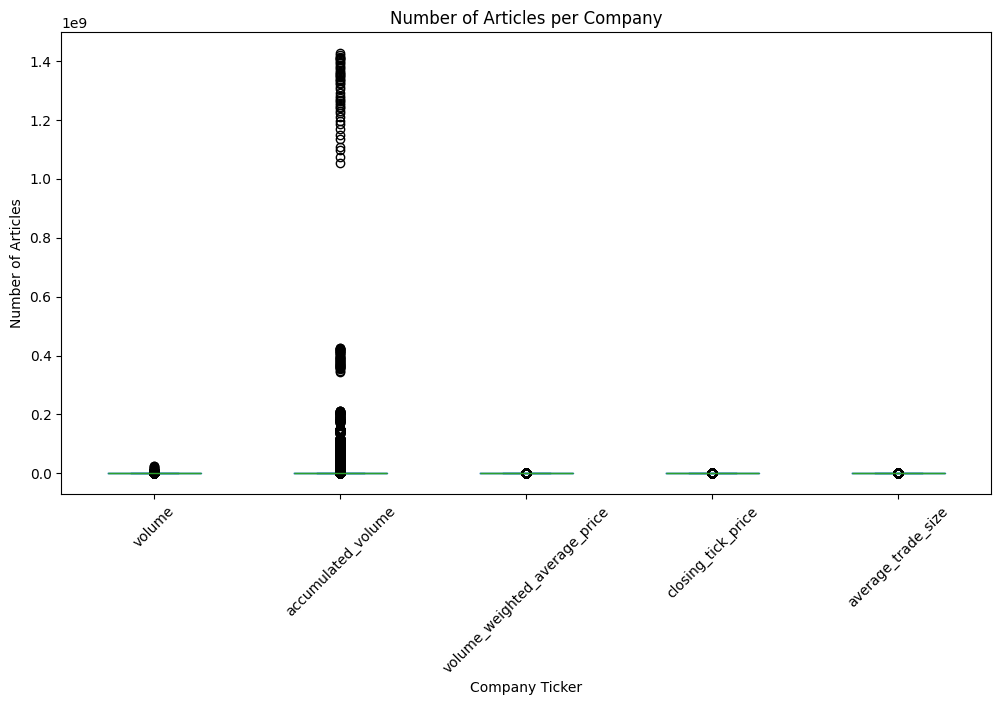

In [10]:
# Generate boxplot of key statistics
df[['volume', 'accumulated_volume', 'volume_weighted_average_price', 'closing_tick_price', 'average_trade_size']].plot.box(figsize=(12, 6))
plt.title("Number of Articles per Company")
plt.xlabel("Company Ticker")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Explore the first 20 unique counts of timestamps per ticker
unique_counts.head(20)

ticker_symbol
AAL      47
AAME      2
AAOI     47
AAON     47
AAPB     27
AAPD     42
AAPG      2
AAPL     47
AAPU     47
AARD      1
AAXJ     46
ABAT     41
ABCL     47
ABCS      2
ABEO     33
ABL      37
ABLLL     1
ABLV      1
ABNB     47
ABOS     24
Name: timestamp, dtype: int64

In [15]:
# Explore row values for AAPL ticker
aapl_data = df[df['ticker_symbol'] == 'AAPL']
print("AAPL data:")
aapl_data.head(50)

AAPL data:


,ticker_symbol,timestamp,volume,accumulated_volume,volume_weighted_average_price,closing_tick_price,average_trade_size
156,AAPL,2025-06-10 10:14:00-04:00,112521,11429463,202.7504,202.8401,60.0
2010,AAPL,2025-06-10 10:15:00-04:00,132817,11562280,202.8109,202.7350,62.0
5177,AAPL,2025-06-10 10:16:00-04:00,141775,11704055,203.0695,203.2350,64.0
7043,AAPL,2025-06-10 10:17:00-04:00,169989,11874044,203.2551,203.2400,69.0
7919,AAPL,2025-06-10 10:18:00-04:00,112936,11986980,203.2295,203.1800,67.0
9738,AAPL,2025-06-10 10:19:00-04:00,115416,12102396,203.1564,203.0550,56.0
11397,AAPL,2025-06-10 10:20:00-04:00,104108,12206504,202.9769,202.8600,56.0
13846,AAPL,2025-06-10 10:21:00-04:00,113776,12320280,202.7775,202.7901,59.0
15562,AAPL,2025-06-10 10:22:00-04:00,107120,12427400,202.7693,202.7750,60.0
15734,AAPL,2025-06-10 10:23:00-04:00,104177,12531577,202.7209,202.6006,67.0


In [16]:
# Explore row values for AAPG ticker
aapg_data = df[df['ticker_symbol'] == 'AAPG']
print("AAPG data:")
aapg_data.head(50)

AAPG data:


,ticker_symbol,timestamp,volume,accumulated_volume,volume_weighted_average_price,closing_tick_price,average_trade_size
48464,AAPG,2025-06-10 10:41:00-04:00,252,2198,29.9981,29.99,50.0
50406,AAPG,2025-06-10 10:42:00-04:00,1222,3420,29.9054,29.90,94.0


In [17]:
# Explore row values for ABOS ticker
abos_data = df[df['ticker_symbol'] == 'ABOS']
print("ABOS data:")
abos_data.head(50)

ABOS data:


,ticker_symbol,timestamp,volume,accumulated_volume,volume_weighted_average_price,closing_tick_price,average_trade_size
200,ABOS,2025-06-10 10:14:00-04:00,200,75908,1.2200,1.2200,100.0
5214,ABOS,2025-06-10 10:16:00-04:00,1624,77532,1.2250,1.2250,406.0
7079,ABOS,2025-06-10 10:17:00-04:00,100,77632,1.2298,1.2298,100.0
11960,ABOS,2025-06-10 10:20:00-04:00,330,77962,1.2335,1.2350,82.0
13895,ABOS,2025-06-10 10:21:00-04:00,2580,80542,1.2350,1.2350,2580.0
15779,ABOS,2025-06-10 10:23:00-04:00,12054,92596,1.2301,1.2301,3013.0
17726,ABOS,2025-06-10 10:24:00-04:00,300,92896,1.2350,1.2350,300.0
19538,ABOS,2025-06-10 10:25:00-04:00,200,93096,1.2350,1.2350,100.0
22516,ABOS,2025-06-10 10:26:00-04:00,317,93413,1.2397,1.2400,79.0
24322,ABOS,2025-06-10 10:28:00-04:00,100,93563,1.2350,1.2350,100.0


In [18]:
# Check if there are any zero values for any of the columns
zero_counts = (df[['volume', 'accumulated_volume', 'volume_weighted_average_price', 'closing_tick_price', 'average_trade_size']] == 0).sum()
print("Zero counts in key statistics:")
print(zero_counts)

Zero counts in key statistics:
volume                           0
accumulated_volume               0
volume_weighted_average_price    0
closing_tick_price               0
average_trade_size               0
dtype: int64


In [19]:
# Check if there are any negative values for any of the columns
negative_counts = (df[['volume', 'accumulated_volume', 'volume_weighted_average_price', 'closing_tick_price', 'average_trade_size']] < 0).sum()
print("Negative counts in key statistics:")
print(negative_counts)

Negative counts in key statistics:
volume                           0
accumulated_volume               0
volume_weighted_average_price    0
closing_tick_price               0
average_trade_size               0
dtype: int64
